In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import os

import pandas as pd
pd.options.mode.chained_assignment = None # avoids assignment warning
import numpy as np
import random
from glob import glob
from tqdm import tqdm
tqdm.pandas()  # enable progress bars in pandas operations
import gc

import librosa
import sklearn
import json

# Import for visualization
import matplotlib as mpl
#cmap = mpl.cm.get_cmap('coolwarm')
import matplotlib.pyplot as plt
import librosa.display as lid
import IPython.display as ipd
# import cv2

# Import KaggleDatasets for accessing Kaggle datasets
# from kaggle_datasets import KaggleDatasets

# WandB for experiment tracking
# import wandb

import torchaudio
# import plotly.express as px
from IPython.display import Audio
# from shapely.geometry import Point

# import plotly.express as px

from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
import torch


In [2]:
df = pd.read_csv("../../data/2024/train_metadata.csv")
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


In [3]:
import librosa

In [4]:
from IPython.display import Audio
train_path = '../../data/2024/train_audio/'
data, rate = librosa.load(train_path + df.filename[13], sr = None)
display(Audio(data[0:rate*5], rate=rate))

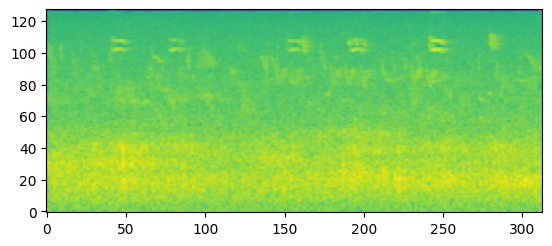

In [17]:
n_fft = 2048
hop_length = 512
n_mels = 128

S = librosa.feature.melspectrogram(y=data[0:rate*5], sr=rate, n_fft=n_fft, hop_length=hop_length,
                                    n_mels=n_mels, fmin = 0, fmax = 16000)

plt.imshow(np.log(S), origin='lower')

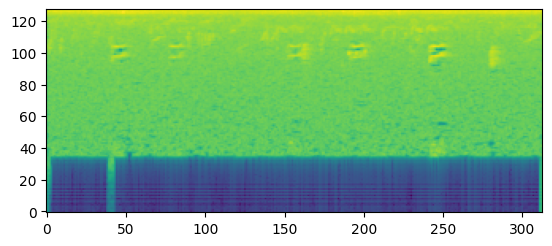

In [18]:
# Calcular os pontos de divisão padrão para as escalas mel
mel_frequencies = librosa.mel_frequencies(n_mels=n_mels)

# Inverter as janelas mel para que as frequências mais altas tenham janelas mais curtas
mel_window = librosa.filters.mel(sr= rate, n_fft = n_fft, n_mels=n_mels, htk=True)

# Inverter a ordem das janelas
mel_window = mel_window[:, ::-1]

# Calcular o espectrograma mel com a escala mel customizada
S = np.dot(mel_window, np.log(np.abs(librosa.stft(data[0:rate*5], n_fft=n_fft, hop_length=hop_length))**2))


plt.imshow(S, origin='lower')

In [21]:
S.max(), S.min()

(0.15937406, -2.5299084)

In [22]:
S = np.exp(S)
S.max(), S.min()

(1.1727766, 0.07966632)